In [1]:
from dataset import ChestCocoDetection
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [69]:
train = ChestCocoDetection(root="D:\\Siim\\siim-covid19-detection", ann_file="D:\\Siim\\siim-covid19-detection\\test.json", training=True)
test = ChestCocoDetection(root="D:\\Siim\\siim-covid19-detection", ann_file="D:\\Siim\\siim-covid19-detection\\test.json", training=False)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


C:\Users\tobia\Anaconda3\envs\aml\lib\site-packages\albumentations\augmentations\transforms.py:688: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


In [70]:
#found = False
#while not found:
idx = np.random.randint(len(train))
train_img = train.__getitem__(idx)
test_img = test.__getitem__(idx)
 #   found = len(train_img[1]['boxes']) > 0

In [71]:
def add_bounding_boxes(target, ax):
    boxes = target['boxes']
    for box in boxes:
        mp_box = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], edgecolor="r", facecolor='none')
        ax.add_patch(mp_box)

def show_samples_for(test, train):
    print(test[1])
    fig, axs = plt.subplots(1, 2, figsize=(10,8))
    #fig.suptitle(f'Study: {samples["id"].iloc[i]}')
    for im_i, (img, data) in enumerate([test, train]):
        ax = axs[im_i] if isinstance(axs, np.ndarray) else axs
        ax.set_title(f'Instance / Image Nr. {im_i + 1} / {2}')
        #dcm = pydicom.dcmread(image_path)
        plt.figure()
        ax.imshow(img.permute(1,2,0), cmap=plt.cm.bone)
        add_bounding_boxes(data, ax)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'image_id': tensor([614]), 'boxes': tensor([[132.6995, 371.7935, 214.6107, 459.5905],
        [597.6009, 487.3631, 782.0856, 617.2668]]), 'area': tensor([ 7191.5591, 23965.2617]), 'labels': tensor([1, 1]), 'size': tensor([2836, 2336], dtype=torch.int16)}


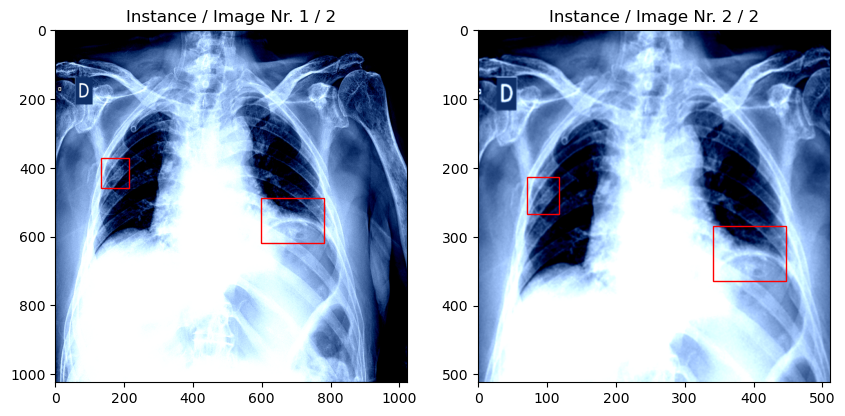

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [72]:
show_samples_for(test_img, train_img)

In [73]:
import torch
from model import ChestRCNN

In [77]:
model = ChestRCNN("../resnet/models/resnext101_32x8d_epoch_35.pt")
model.load_state_dict(torch.load("./models/fasterrcnn_epoch_50.pt"))
model.eval()

ChestRCNN(
  (model): FasterRCNN(
    (transform): GeneralizedRCNNTransform(
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        Resize(min_size=(512,), max_size=1333, mode='bilinear')
    )
    (backbone): BackboneWithFPN(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (act1): ReLU(inplace=True)
            (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False

In [78]:
test_img[0].shape

torch.Size([3, 1024, 1024])

In [85]:
%%timeit
with torch.inference_mode():
    pred = model([test_img[0]])

1.51 s ± 22.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [86]:
%%timeit
pred = model([test_img[0]])

1.43 s ± 33.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [87]:
pred

[{'boxes': tensor([[607.2952, 461.4432, 785.9705, 600.2473],
          [109.0460, 333.2744, 226.3909, 590.6571],
          [621.1095, 481.2623, 757.2675, 549.4169],
          [ 86.5114, 295.3109, 280.5846, 657.3203],
          [656.4078, 488.0307, 788.7249, 559.2202],
          [608.3500, 520.7546, 761.6434, 583.5790],
          [576.7252, 437.0339, 831.3492, 634.6019],
          [609.5730, 384.0609, 746.5769, 627.8071],
          [673.3958, 475.6502, 723.7112, 600.1133],
          [599.3575, 416.7862, 795.4134, 550.3740],
          [ 88.4393, 342.9174, 236.3822, 487.8107],
          [130.6207, 272.9330, 241.6007, 520.4904],
          [162.9937, 342.5936, 201.1803, 506.2877],
          [599.0869, 285.7393, 811.0717, 604.3122],
          [119.7852, 359.2709, 223.7148, 427.5298],
          [101.7894, 433.1967, 274.9426, 605.7931],
          [672.9018, 375.4814, 804.2763, 611.0541],
          [ 82.2352, 336.8555, 187.6544, 619.1285],
          [113.7101, 398.5196, 215.1152, 481.5449]], gr

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'image_id': tensor([614]), 'boxes': tensor([[132.6995, 371.7935, 214.6107, 459.5905],
        [597.6009, 487.3631, 782.0856, 617.2668]]), 'area': tensor([ 7191.5591, 23965.2617]), 'labels': tensor([1, 1]), 'size': tensor([2836, 2336], dtype=torch.int16)}


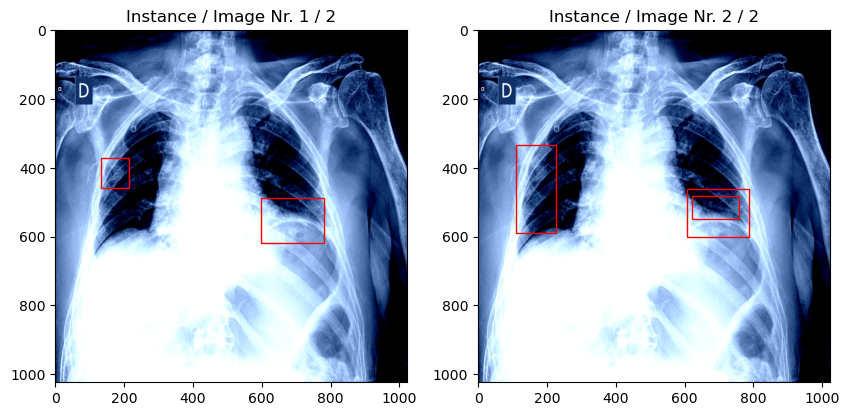

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [88]:
pred[0]['boxes'] = [box for box, score in zip(pred[0]['boxes'].detach().numpy(), pred[0]['scores']) if score > .5]
show_samples_for(test_img, (test_img[0], pred[0]))

In [13]:
import pandas as pd
def make_df(eval_stats):
    return pd.DataFrame(data=eval_stats, columns=["AP50:95", "AP50", "AP75", "AP50:95small", "AP50:95medium", "AP50:95large", "AR50:95", "AR50", "AR75", "AR50:95small", "AR50:95medium", "AR50:95large"])

In [14]:
stats = np.load("losses/fasterrcnn_eval_stats_50.npy")

In [15]:
df = make_df(stats)

In [16]:
df

,AP50:95,AP50,AP75,AP50:95small,AP50:95medium,AP50:95large,AR50:95,AR50,AR75,AR50:95small,AR50:95medium,AR50:95large
0,0.038168,0.168311,0.004055,-1.0,-1.0,0.038168,0.039542,0.169866,0.258042,-1.0,-1.0,0.258042
1,0.078941,0.294308,0.023130,-1.0,-1.0,0.078941,0.072791,0.234711,0.260712,-1.0,-1.0,0.260712
2,0.111939,0.379671,0.030202,-1.0,-1.0,0.111939,0.100064,0.238970,0.257978,-1.0,-1.0,0.257978
3,0.110982,0.384580,0.029720,-1.0,-1.0,0.110982,0.098220,0.251558,0.288175,-1.0,-1.0,0.288175
4,0.125414,0.435254,0.030937,-1.0,-1.0,0.125414,0.105086,0.270820,0.306421,-1.0,-1.0,0.306421
5,0.108153,0.384463,0.026172,-1.0,-1.0,0.108153,0.091481,0.266751,0.306421,-1.0,-1.0,0.306421
6,0.122733,0.413673,0.035811,-1.0,-1.0,0.122733,0.105213,0.288748,0.317228,-1.0,-1.0,0.317228
7,0.120279,0.415251,0.032352,-1.0,-1.0,0.120279,0.105022,0.285188,0.310108,-1.0,-1.0,0.310108
8,0.122255,0.427314,0.030545,-1.0,-1.0,0.122255,0.105149,0.296313,0.320534,-1.0,-1.0,0.320534
9,0.116398,0.402591,0.027387,-1.0,-1.0,0.116398,0.099110,0.288748,0.310807,-1.0,-1.0,0.310807


<Figure size 640x480 with 0 Axes>

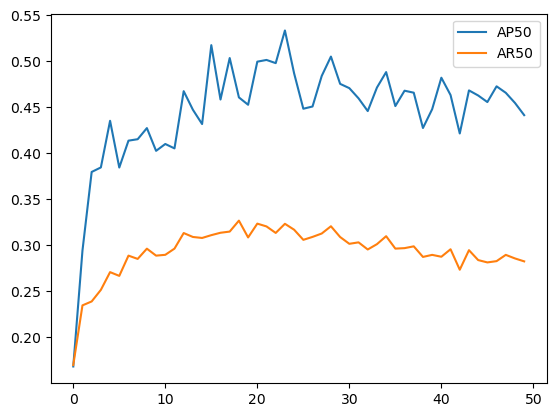

In [21]:
plt.figure()
df.plot(y=["AP50", "AR50"])
plt.show()

In [3]:
import numpy as np
import math

In [ ]:
lf = lambda x: ((((1 + math.cos(x * math.pi / 35)) / 2) ** 1.0) * 0.95 + 0.05) * 0.001
x = np.arange(35)